# Plotting with ACS plotting script and regional statistics
Using code from https://github.com/AusClimateService/plotting_maps/tree/main

In [1]:
cd /g/data/mn51/users/dh4185/repos_collab/plotting_maps

/g/data/mn51/users/dh4185/repos_collab/plotting_maps


In [2]:
# import ACS plotting maps and Xarray.
import sys
sys.path.append("/g/data/mn51/users/dh4185/repos_collab/plotting_map")

# import needed packages
from acs_area_statistics import acs_regional_stats, regions
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr
import numpy as np

In [3]:
root_dir = "/g/data/ia39/ncra/drought_aridity/ai/"
index = "AI-atmospheric-based"
index_short = "AI"
data_type = "2D"
rcp = "rcp85"
mme_set = ["model","bc"]
quantiles = [0.1,0.5,0.9]

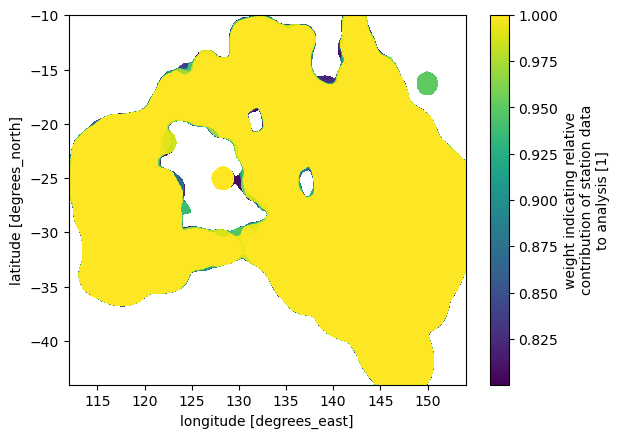

In [4]:
#< AGCD masking
mask_ds = xr.open_dataset("/g/data/mn51/users/dh4185/agcd_v1-0-2_precip_weight_r005_daily_1975_2005fraction_ge1.nc").sel(lat=slice(-44,-10),lon=slice(112,154))
q_mask = np.ma.masked_greater(mask_ds.fraction,0.8)
mask_ds.fraction.where(q_mask.mask).plot()

In [5]:
#< If mask file doesn't exist, run below command to create it
# python3 /g/data/mn51/users/dh4185/hazards-drought/AGCD_masking.py --ClimStartYr 1975 --ClimEndYr 2005

### GWLs

GWL: GWL1.2
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL1.5
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL2.0
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL3.0
Percentile: 10
Percentile: 50
Percentile: 90


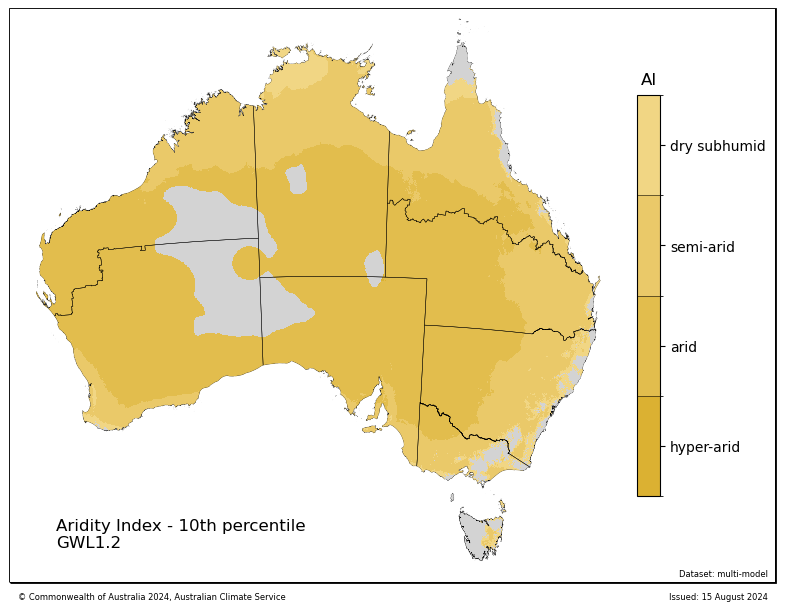

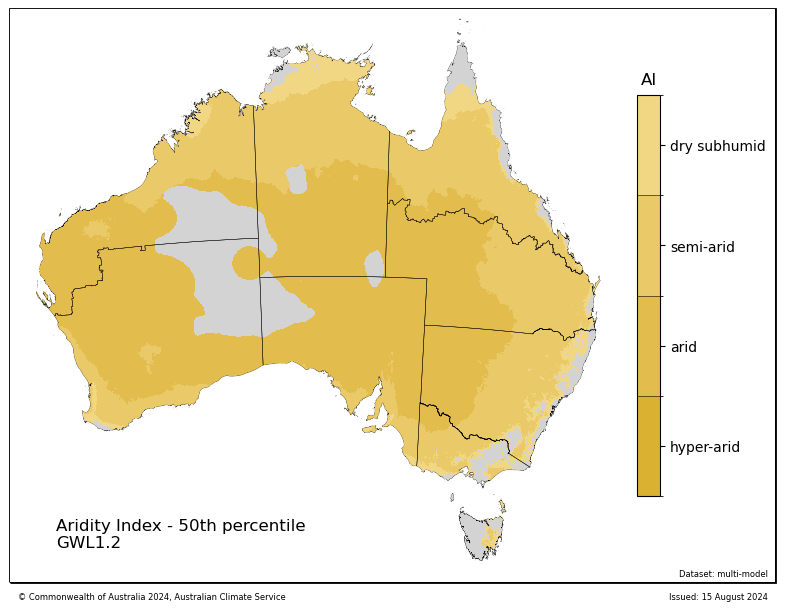

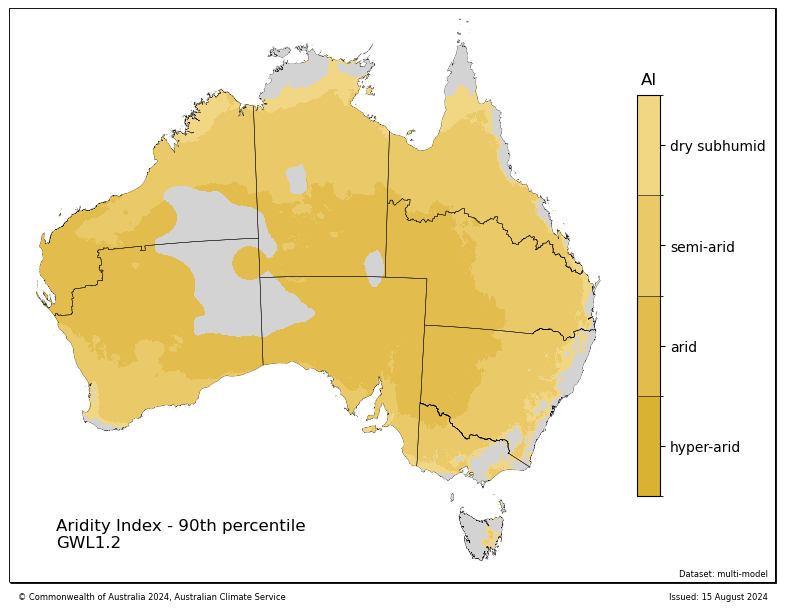

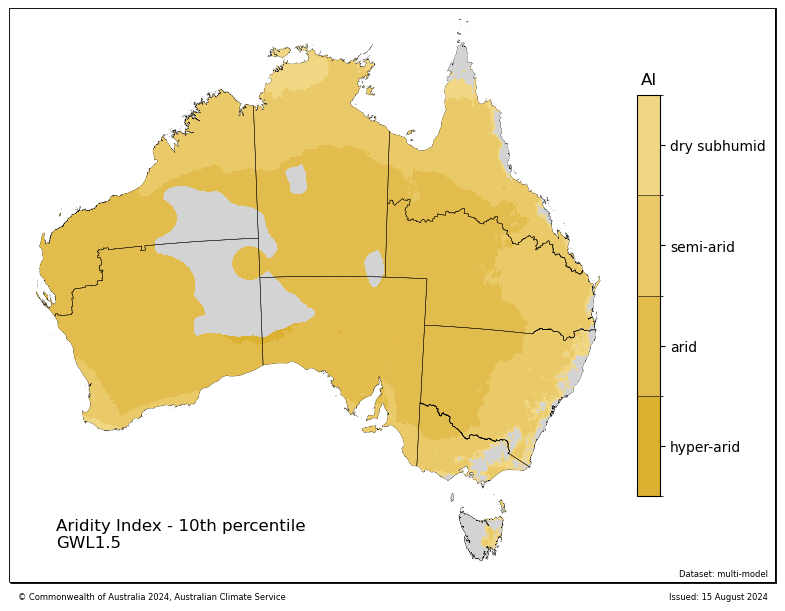

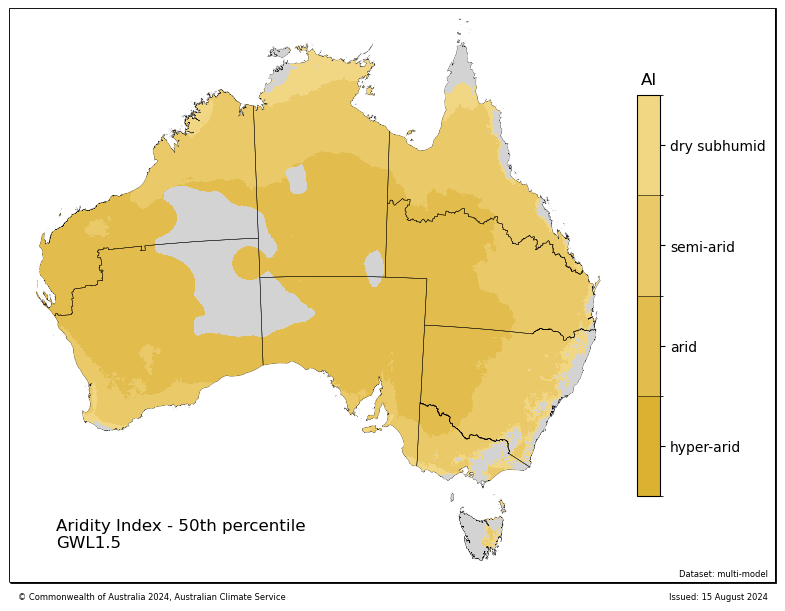

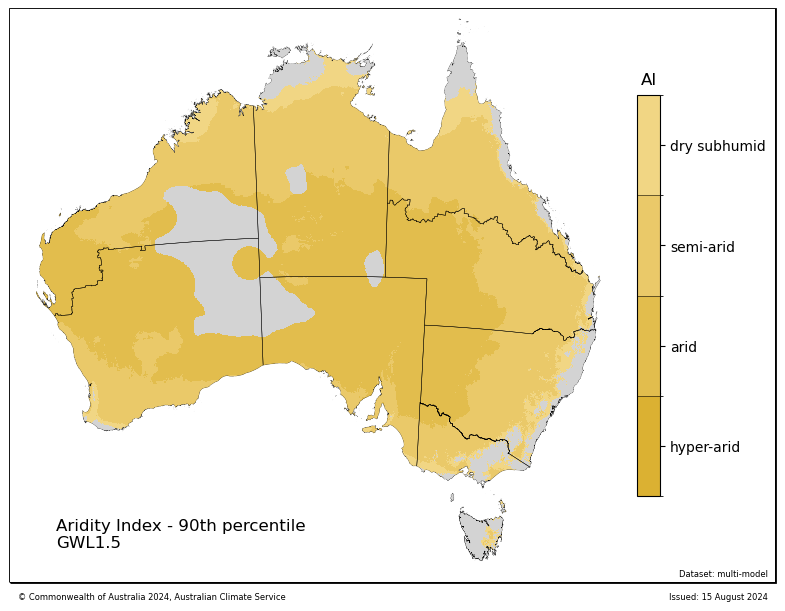

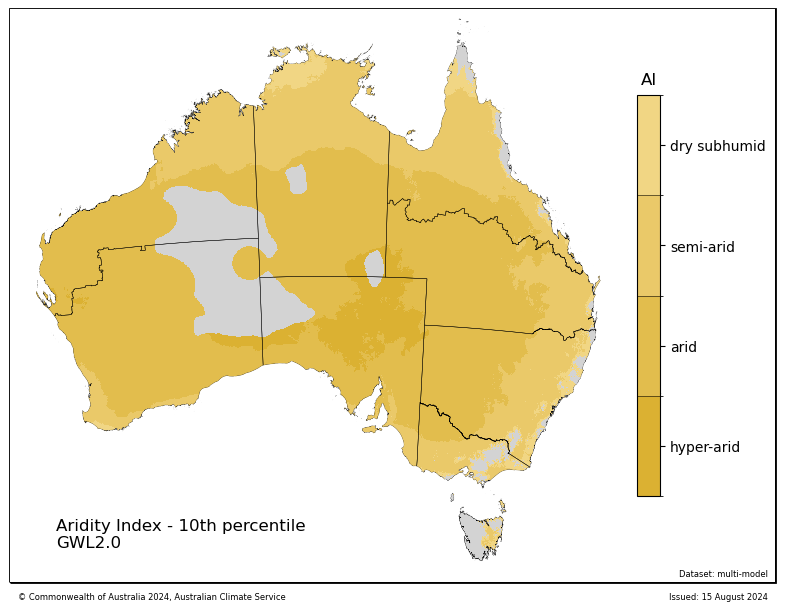

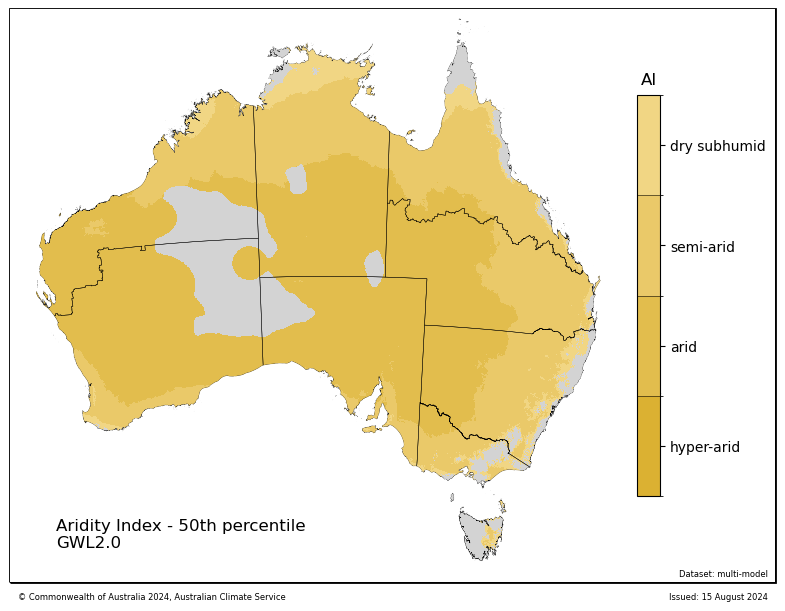

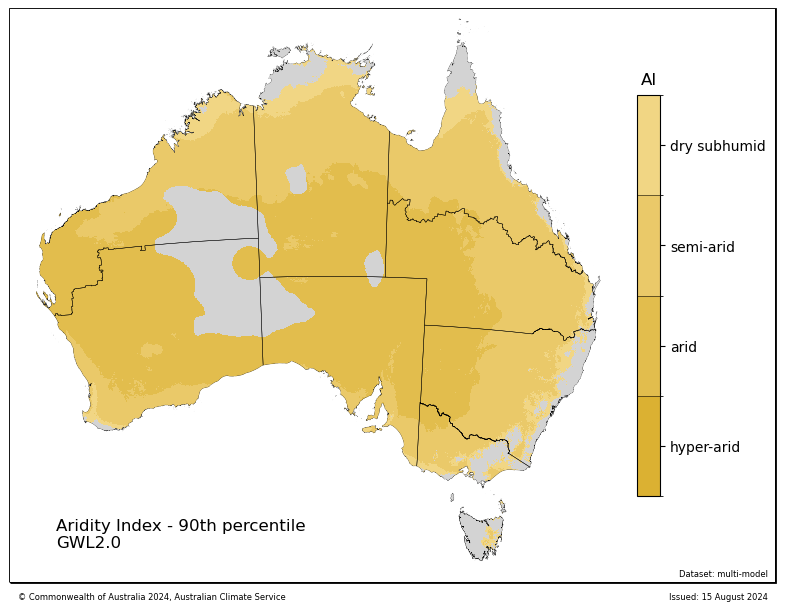

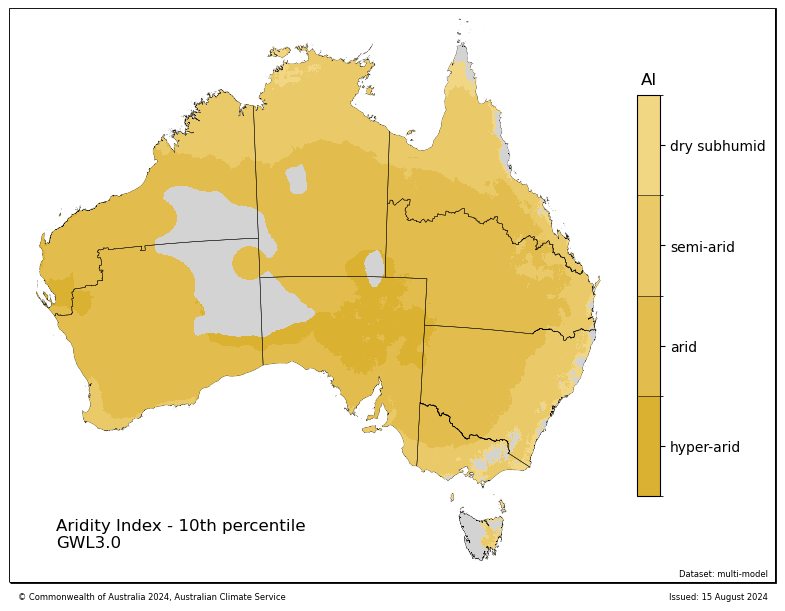

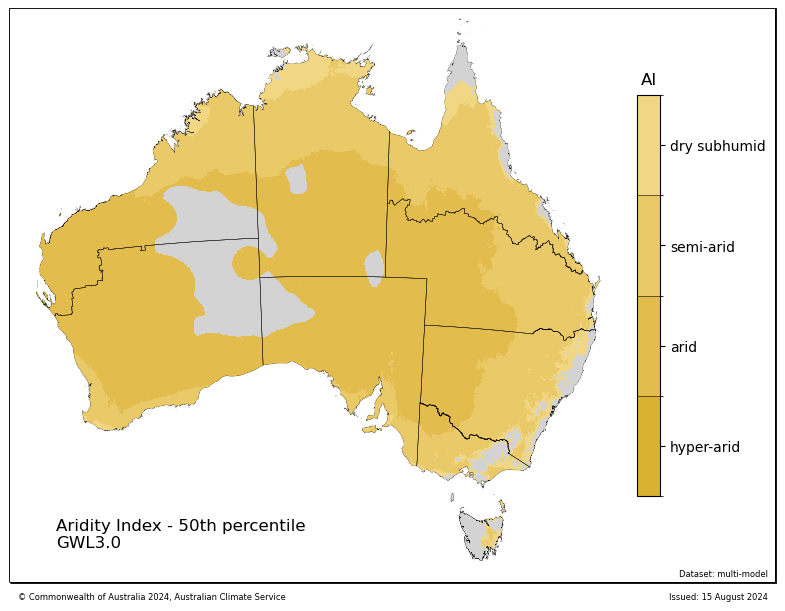

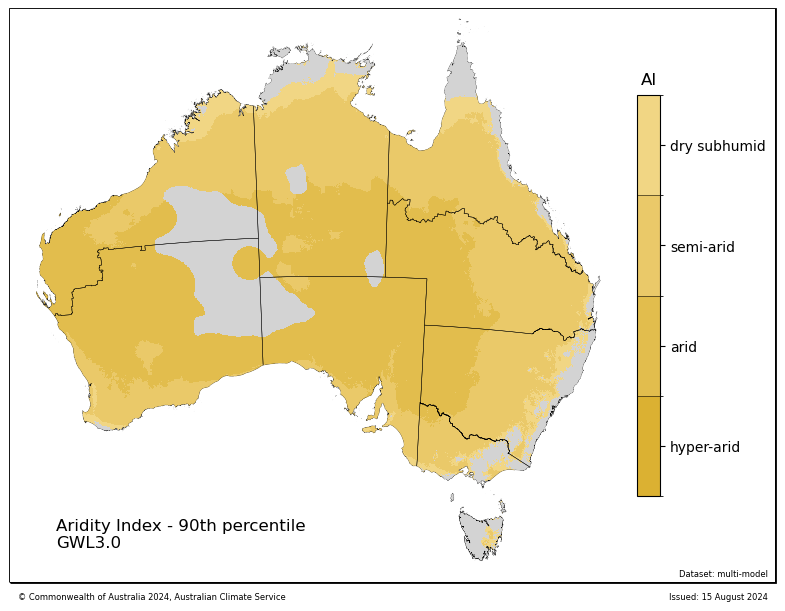

In [6]:
# GWLs
gwl = ["GWL12","GWL15","GWL20","GWL30"]
for _gwl in gwl:
    quantiles_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{_gwl}_percentiles10-50-90.nc")
    print(f"GWL: {_gwl[:4]}.{_gwl[4:]}")
    for q in quantiles:
        prcntl = int(q*100)
        print(f"Percentile: {prcntl}")
        quantiles_da = quantiles_ds.AI.sel(quantile=q).where(q_mask.mask)
        
        plot_acs_hazard(data =  quantiles_da.where(quantiles_da<0.65),
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index - {prcntl}th percentile ",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["aridity"],
                ticks = tick_dict['aridity_index_ticks'],
                tick_labels = ["hyper-arid","arid","semi-arid","dry subhumid"],#tick_dict['aridity_index_labels'],
                cbar_label = "AI",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{_gwl}_percentile{prcntl}_plot.png",
                );

GWL: GWL1.5
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL2.0
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL3.0
Percentile: 10
Percentile: 50
Percentile: 90


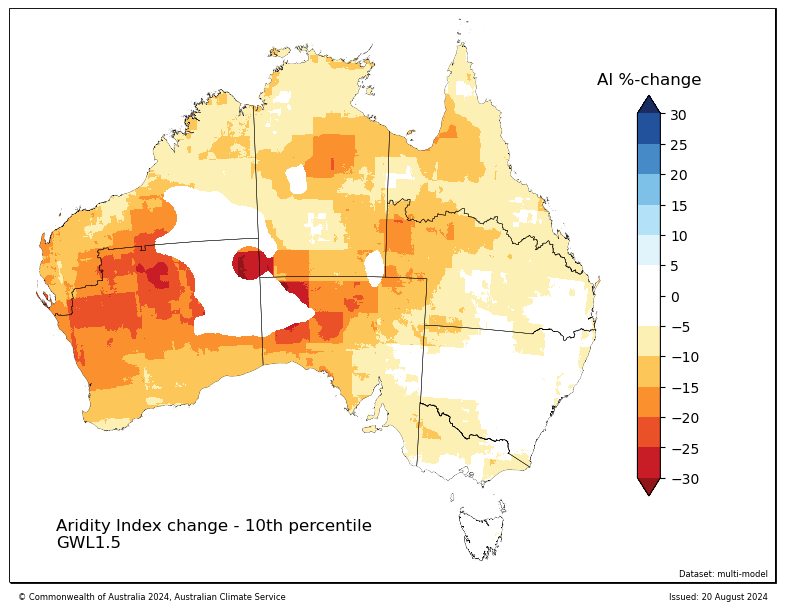

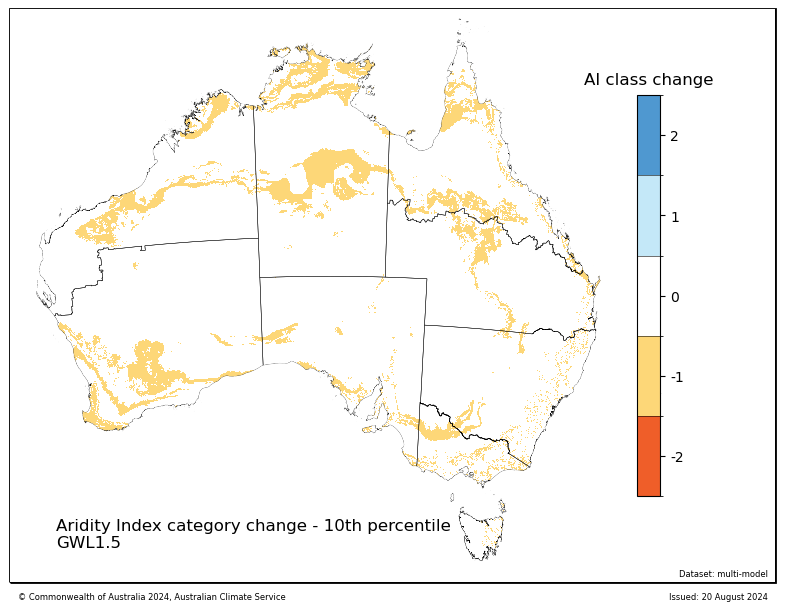

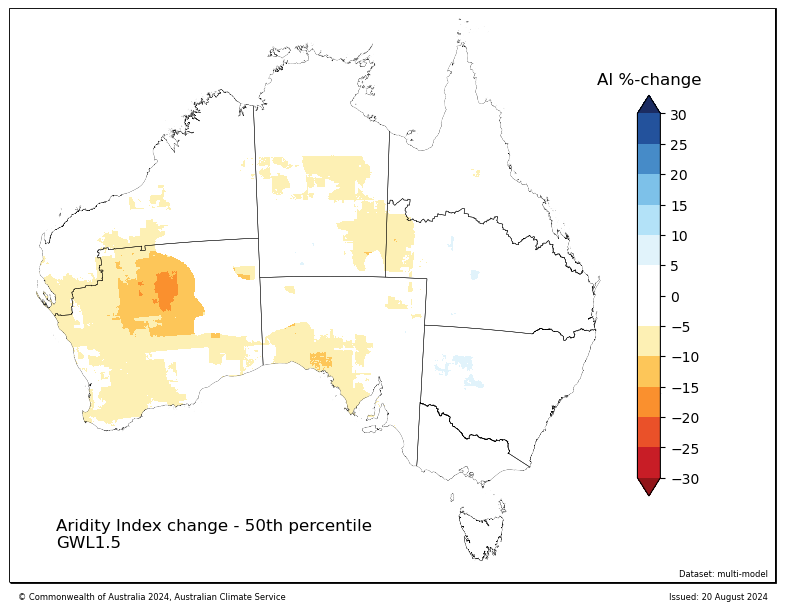

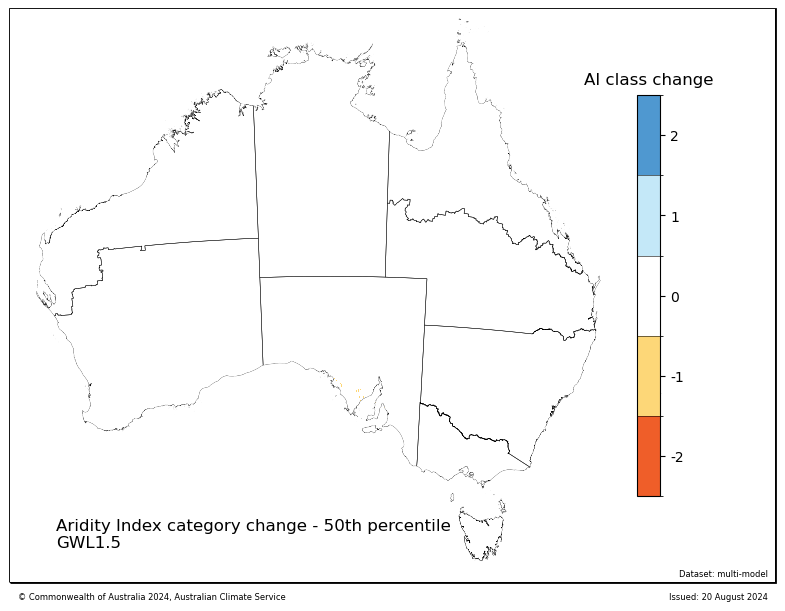

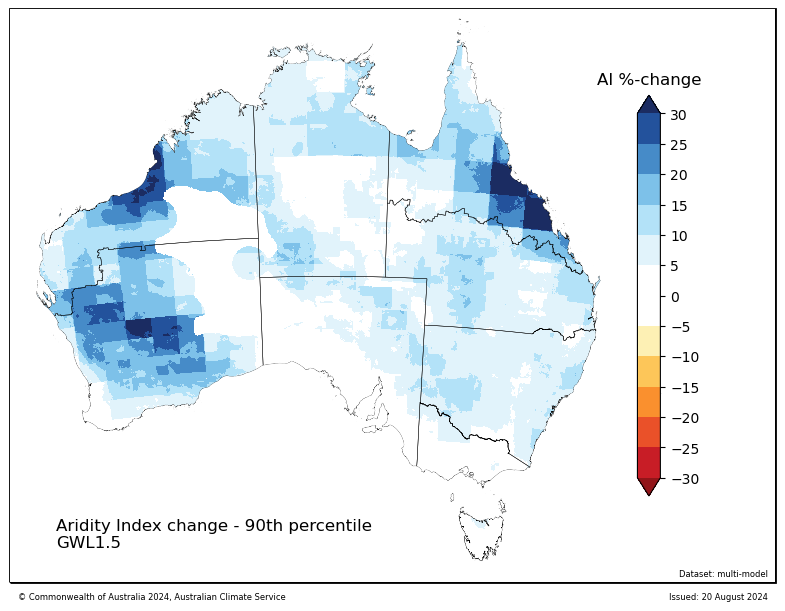

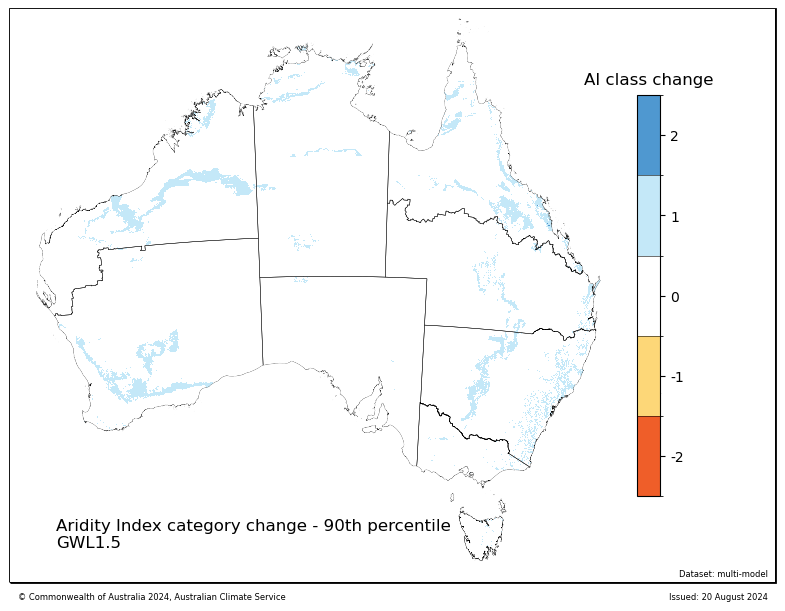

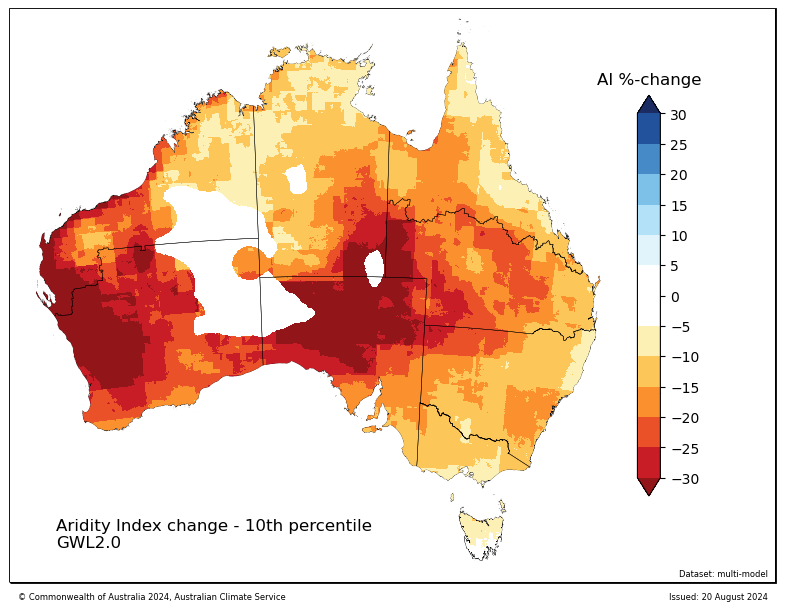

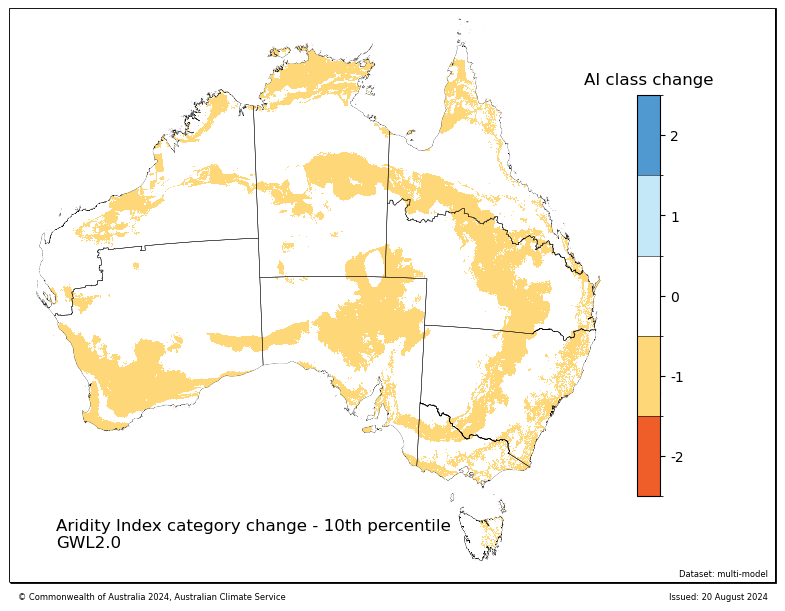

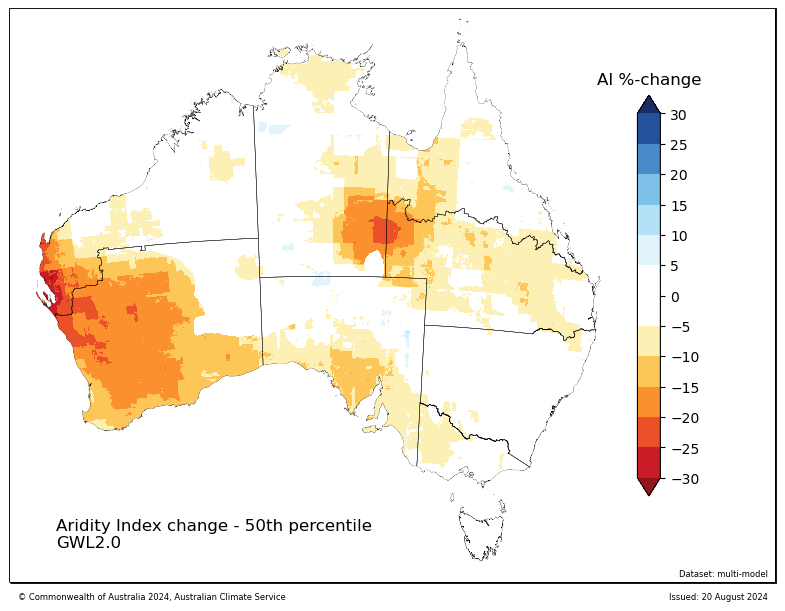

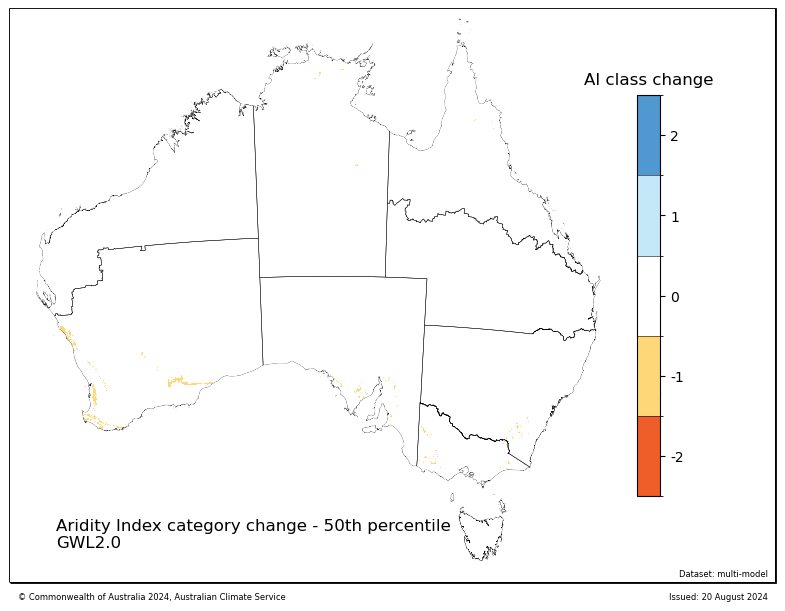

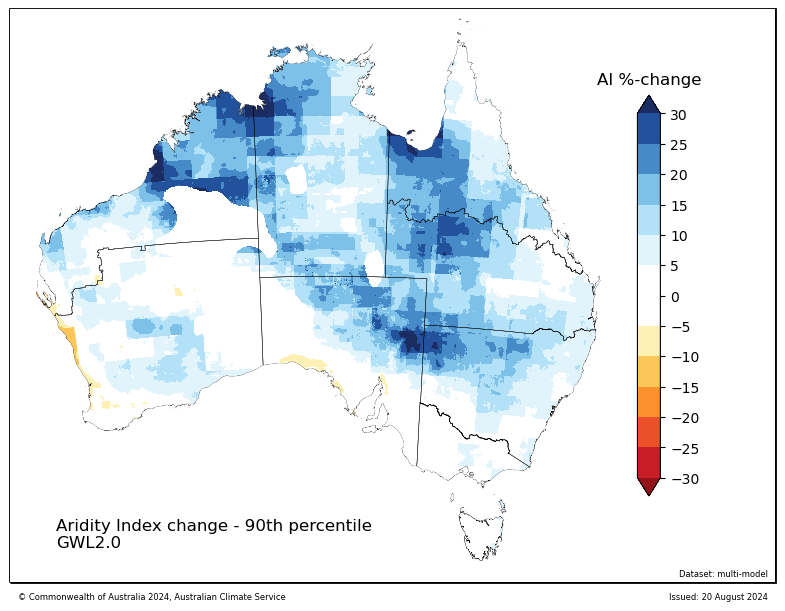

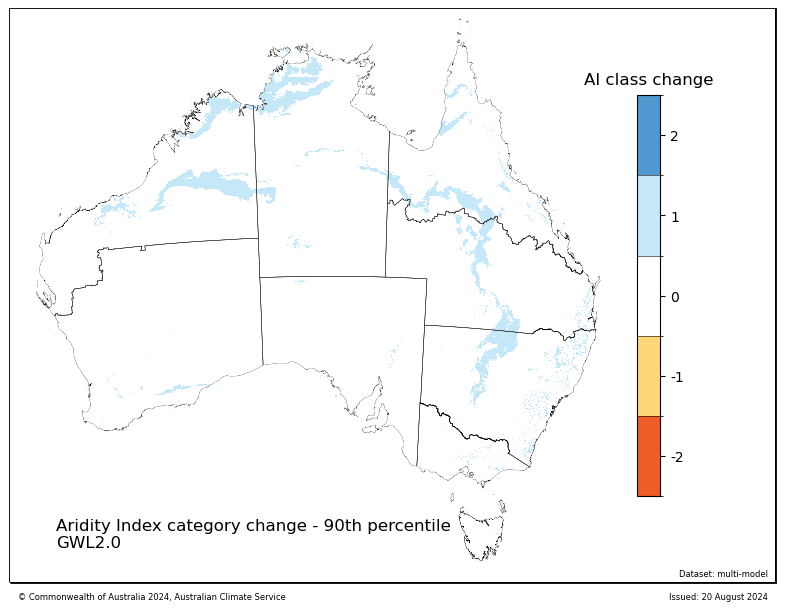

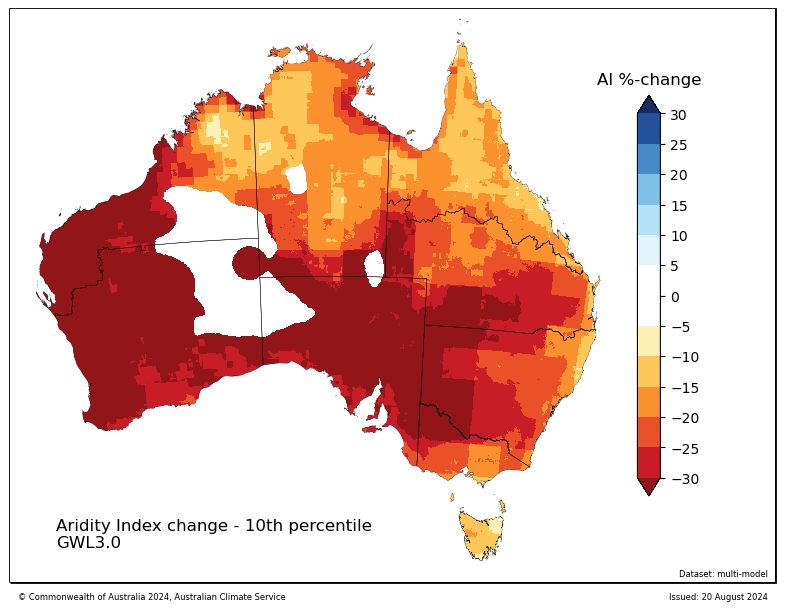

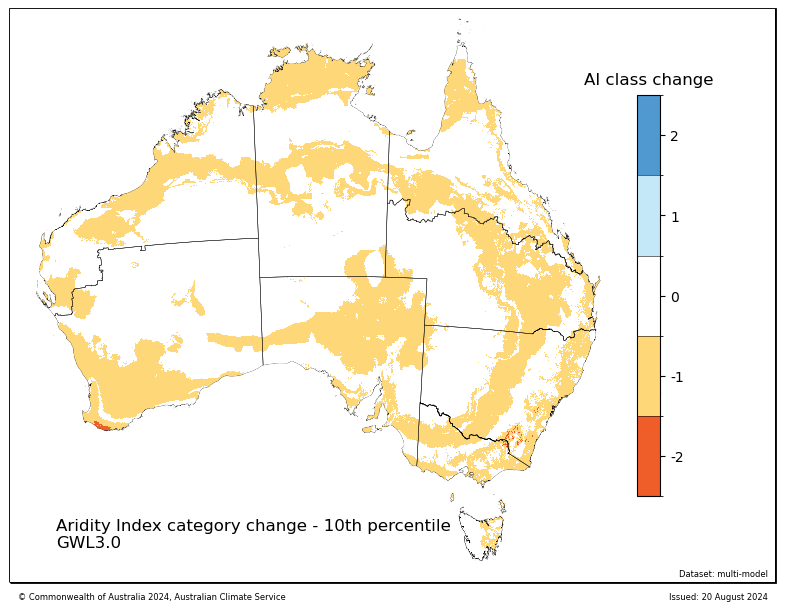

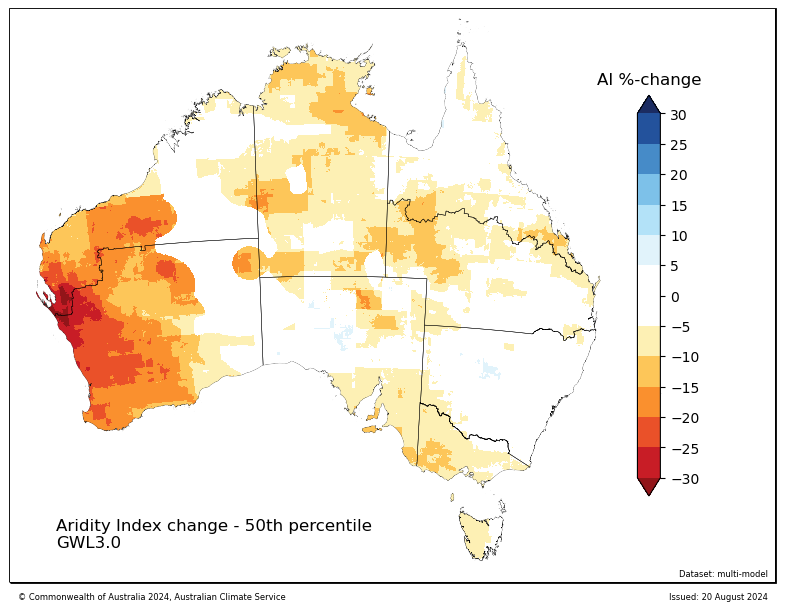

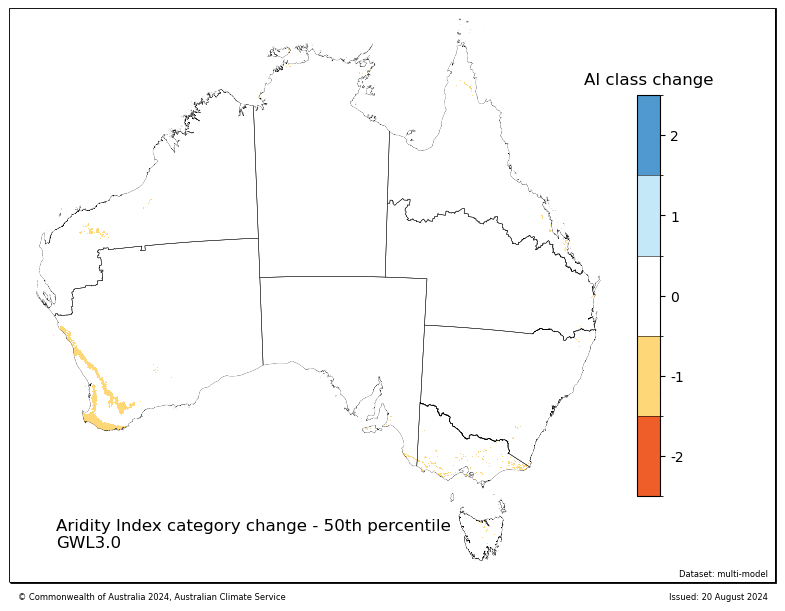

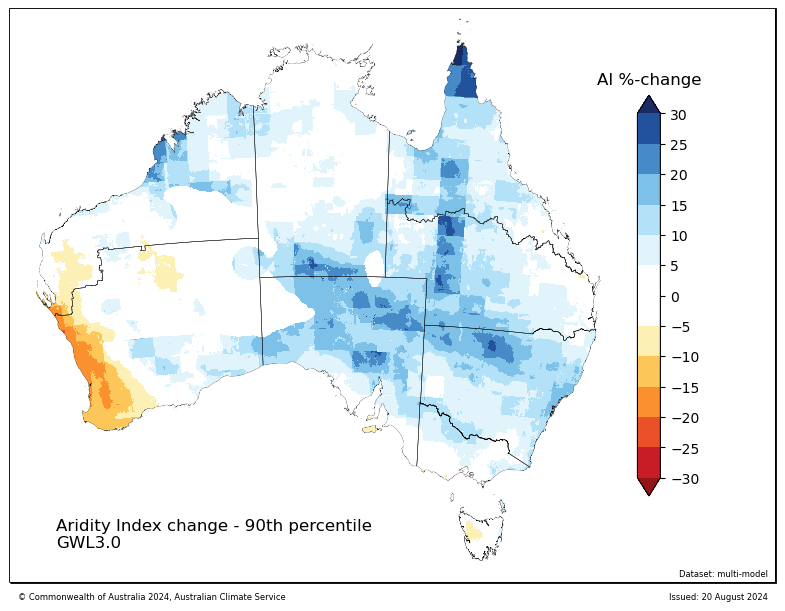

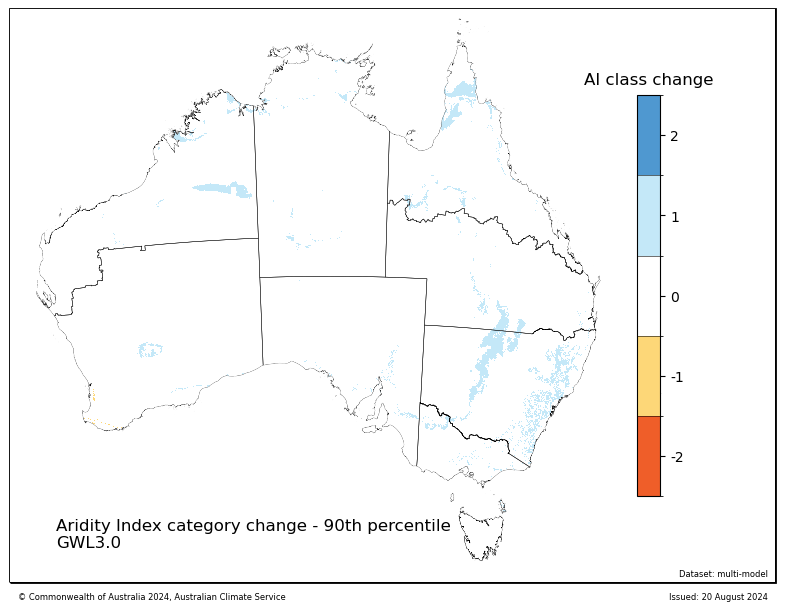

In [12]:
# GWL change
gwl = ["GWL15","GWL20","GWL30"]
for _gwl in gwl:
    print(f"GWL: {_gwl[:4]}.{_gwl[4:]}")
    
    change = f"{_gwl}_prct-change-to-GWL12"
    quantiles_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{change}_percentiles10-50-90.nc")

    zone_change = f"{_gwl}_zone-change-to-GWL12"
    quantiles_zones_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{zone_change}_percentiles10-50-90.nc")
    
    for q in quantiles:
        prcntl = int(q*100)
        print(f"Percentile: {prcntl}")
        quantiles_da = quantiles_ds.AI.sel(quantile=q).where(q_mask.mask)
        quantiles_zone_da = quantiles_zones_ds.AI.sel(quantile=q).where(q_mask.mask)
        
        plot_acs_hazard(data = quantiles_da,#.where(quantiles_da<0.65),
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index change - {prcntl}th percentile ",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["anom_r"],
                ticks = np.arange(-30, 35, 5),#[-.1, -.075, -.05, -.025, 0, .025, .05, .075, .1],
                # tick_labels=np.arange(-30, 40, 10),#[-.1, -.075, -.05, -.025, 0, .025, .05, .075, .1],
                cbar_label = "AI %-change",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{change}_percentile{prcntl}_plot.png",
                );

        plot_acs_hazard(data = quantiles_zone_da,
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index category change - {prcntl}th percentile",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["anom_r"],
                ticks = [-2, -1, 0, 1, 2],
                tick_labels=[-2, -1, 0, 1, 2],
                cbar_label = "AI class change",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{zone_change}_percentile{prcntl}_plot.png",
                );

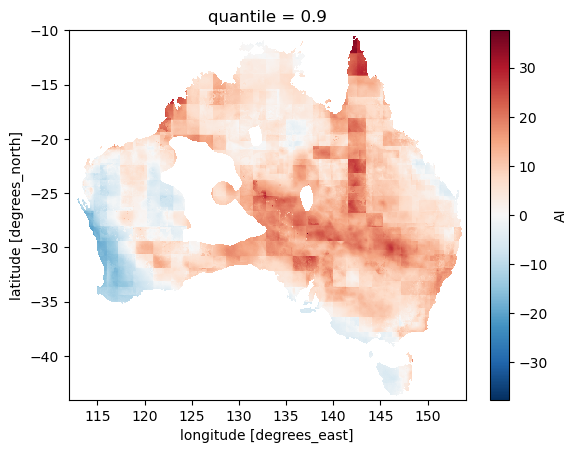

In [7]:
quantiles_da.plot()